## K-nearest neighbors (KNN)

- **Lazy learning algorithm**; Dosen't learn a discriminative function from the training data, but **memorizes the training dataset instead**
- Belongs to a **instance-based learning** category; memorizing the training dataset. In constrast to:
    - Parametric Models (estimate parameters from the training dataset): Perceptron, logistic regression, linear SVM.
    - Nonparametric (Number of parameters grows with the training data): Decision tree classifier, random forest, kenerl SVM
    
---

#### Summarized in three steps
1. Choose the number of **k** and a distance metric
2. Find the **k** nearest neighbors of the sample that we want to classify
3. Assign the class label by **majority vote**

---

- Based on the chosen distance metric, algorithm finds the **k samples** in the training dataset that are closest to the point we want to classify.

In [5]:
# Load the dataset

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)

iris = datasets.load_iris()

# Assign petal length and petal width to X matrix (150 samples)
X = iris.data[:, [2, 3]]

# Class labels
y = iris.target

# Split the dataset into separate training and test datasets.
from sklearn.cross_validation import train_test_split

# Split the X and y arrays into 30 percent test data, and 70 (45 samples) percent training data (105 samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Optimization - Feature scaling
from sklearn.preprocessing import StandardScaler

# Initlalize a new StandardScaler object, sc
sc = StandardScaler()

# Using the fit method, estimate the sample mean and standard deviation for each feature demension. 
sc.fit(X_train)

# Transform both training and test sets using the sample mean and standard deviations
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [2]:
# Plotting Function

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                          np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all the samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=c1)
        
    # highlight the test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')
    

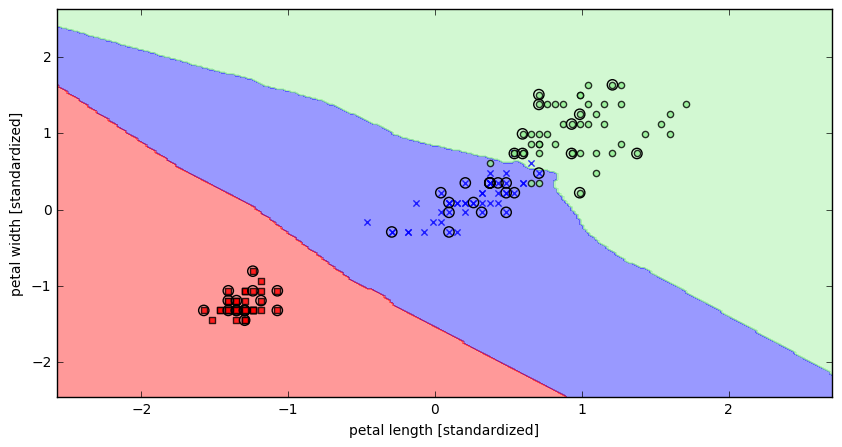

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Specifying 5 neighbors, we obtain a smooth decision boundary, shown in the figure.

# Minkowski, is a generalization of the Euclidean and Manhattan distance.
# P=1 is Manhattan
# P=2 is Euclidean
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()